# Naive Bayes for Flower Recognition
In this assignment, you will be asked to implement Gaussian Naive Bayes by yourself (sci-kit learn is not allowed) and use it classify what kind of iris flower the sample is given its features listed below:
1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 

There are three kinds of flowers: Iris Setosa, Iris Versicolour and Iris Virginica.
The data we get comes from [Kaggle: Iris Dataset Visualization and Machine Learning](https://www.kaggle.com/xuhewen/iris-dataset-visualization-and-machine-learning). Make sure you have installed pandas, numpy and seaborn before running the script.
```bash
    conda install pandas numpy seaborn
```
or

```bash
    pip3 install pandas numpy seaborn
```
The following code loads the data and the dataset looks like the following:

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline
from sklearn.utils import shuffle
iris = pd.read_csv('iris_data.txt', header=None) #read dataset
iris.columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species'] # rename each column
iris_visual = shuffle(iris, random_state = 0) # shuffle the dataset
iris_visual.head(10) #print the top ten entries

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
114,5.8,2.8,5.1,2.4,Iris-virginica
62,6.0,2.2,4.0,1.0,Iris-versicolor
33,5.5,4.2,1.4,0.2,Iris-setosa
107,7.3,2.9,6.3,1.8,Iris-virginica
7,5.0,3.4,1.5,0.2,Iris-setosa
100,6.3,3.3,6.0,2.5,Iris-virginica
40,5.0,3.5,1.3,0.3,Iris-setosa
86,6.7,3.1,4.7,1.5,Iris-versicolor
76,6.8,2.8,4.8,1.4,Iris-versicolor
71,6.1,2.8,4.0,1.3,Iris-versicolor


In [9]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Visualization of the dataset.
The following code visualize the distribution of each pair of the features within each class. (Diagnals are probability density function for each feature).

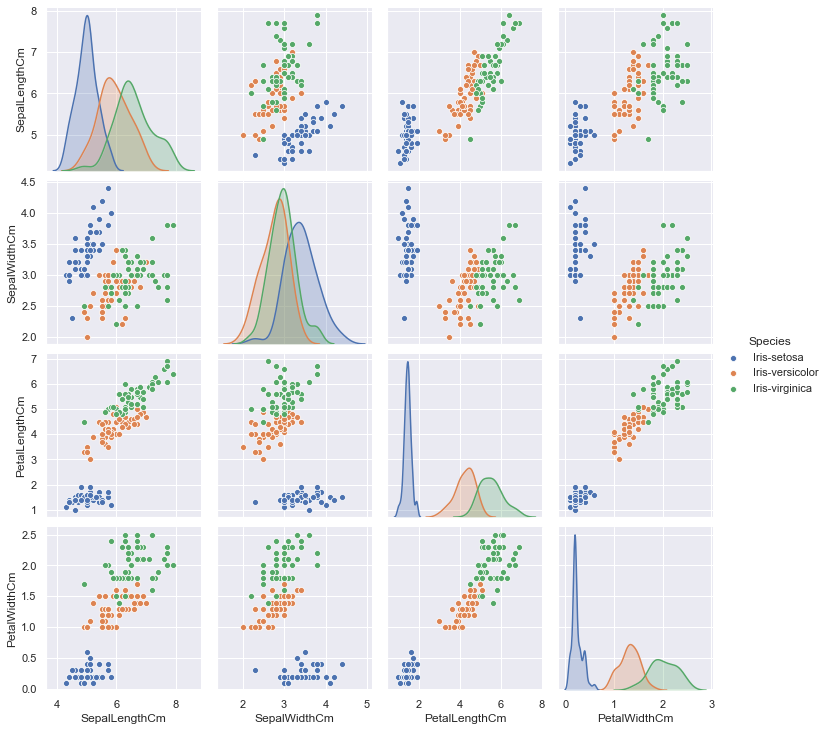

In [10]:
import seaborn as sns
sns.set()
sns.pairplot(iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']],
             hue="Species", diag_kind="kde")

## Data splitting
Next, we split the data into training and testing sets according to 60/40 rule. 

In [11]:
from sklearn.model_selection import train_test_split
iris_data = np.array(iris)
X_trn, X_tst, y_trn, y_tst = train_test_split(iris_data[:,0:4], iris_data[:,4], test_size = 0.4, random_state = 0) # split the dataset into training and testing sets

# Problem 1 Write your own Gaussian Naive Bayes code
Using the skeleton provided below, write your own code for learning and inference using Gaussian Naive Bayes model. You can use the skeleton provided in the second problem to verify whether you are writing it correctly. Reading through chapter 1.9.1 in the following link and the slide from last year can be useful:
https://scikit-learn.org/stable/modules/naive_bayes.html

https://www.dropbox.com/s/6d5h6fig1fj44e4/Naive_Bayes.pdf?dl=0

In [12]:
X_trn.shape

(90, 4)

In [13]:
def gnb_train(X, y):
    # X is the training set where each row is a sample and each column is a feature.
    # y is the training labels which correspond to each row of X
    output_labels = list(set(y)) #all possible outputs in the training set
    output_size = len(output_labels) # the number of all possible outputs
    prior = np.zeros(output_size) #the prior distribution over the outputs
    mean = np.zeros((output_size, X.shape[1])) # a m by n matrix where m is the number of outputs, 
                                            # and n is the number of features
                                            # mean[i,j] is the mean for feature j for samples whose output is i.
    std = np.zeros((output_size, X.shape[1])) # a m by n matrix where m is the number of outputs, 
                                            # and n is the number of features
                                            # std[i,j] is the standard deviation for feature j for samples whose output is i.
# ======= Your Code Starts Here =======

    # Setup
    index_setosa = 0
    index_versicolor = 0
    index_virginica = 0
    
    n_setosa = ((y == 'Iris-setosa').sum())
    n_versicolor = ((y == 'Iris-versicolor').sum())
    n_virginica = ((y == 'Iris-virginica').sum())
    
    features_setosa = np.zeros((n_setosa, len(X[0])))
    features_versicolor = np.zeros((n_versicolor, len(X[0])))
    features_virginica = np.zeros((n_virginica, len(X[0])))

    # Separating features to correlated label groups
    for i in range(len(y)):
        if y[i] == 'Iris-setosa':
            features_setosa[index_setosa] = X[i]
            index_setosa += 1
        elif y[i] == 'Iris-versicolor':
            features_versicolor[index_versicolor] = X[i]
            index_versicolor += 1
        else:
            features_virginica[index_virginica] = X[i]
            index_virginica += 1
    
    # Calculation of prior
    len_y = len(y)
    prior = (n_setosa / len_y), (n_versicolor / len_y), (n_virginica / len_y)

    # Calculation of mean
    mean[0] = sum(features_setosa) / (n_setosa) # Iris-setosa
    mean[1] = sum(features_versicolor) / (n_versicolor) # Iris-versicolor
    mean[2] = sum(features_virginica) / (n_virginica) # Iris-virginica
    
    # Calculation of standard deviation
    std[0] = np.sqrt(sum((features_setosa - mean[0])**2) / (n_setosa))
    std[1] = np.sqrt(sum((features_versicolor - mean[1])**2) / (n_versicolor))
    std[2] = np.sqrt(sum((features_virginica - mean[2])**2) / (n_virginica))

    return prior, mean, std, output_labels

def gnb_predict(X, prior, mean, std, output_labels):
    predict = [] # predict is a list of predicts with length same as the number of samples
# ======= Your Code Starts Here =======
    for i in range(len(X)):
        calc = (-(1.0 / (2.0 * (std ** 2.0)) * ((X[i] - mean)**2.0)))
        exponent = np.exp(calc.astype(np.float)) # need to convert to float first
        prob_array = (1 / (np.sqrt(2 * math.pi * (std**2)))) * exponent
        
        prob_setosa = prior[0]
        prob_versicolor = prior[1]
        prob_virginica = prior[2]
        
        for j in range(len(X[0])):
            prob_setosa = prob_setosa * prob_array[0,j]
            prob_versicolor = prob_versicolor * prob_array[1,j]
            prob_virginica = prob_virginica * prob_array[2,j]
            
        prediction = max(prob_setosa, prob_versicolor, prob_virginica)

        if prediction == prob_setosa:
            predict.append(output_labels[1])
        elif prediction == prob_versicolor:  
            predict.append(output_labels[0])
        else:
            predict.append(output_labels[2])
    
    return predict

# Problem 2: Inference on IRIS dataset
Using your own GNB functions, implementing Gaussian Naive Bayes algorithm for the first feature, the first two features, the first three features and the first four features. Output the error for each experiment and explain using the visualization of the dataset.

In [19]:
from sklearn.metrics import hamming_loss
for i in range(1,5):
    error = 0
    #======Your code here============
    
    # error = count number of correct / test set
    test_prior, test_mean, test_std, test_output_labels = gnb_train(X_trn[:,:i], y_trn)
    test_predict = gnb_predict(X_tst[:,:i], test_prior, test_mean, test_std, test_output_labels)
    
    for a in range(len(y_tst)):
        if test_predict[a] != y_tst[a]:
            error = error + 1
            
    error = error / (len(y_tst))
    #======Your code here============
    print("Test error using first", i, "features:",  error)
#     print(test_predict)
#     print(len(y_tst))

Test error using first 1 features: 0.7333333333333333
Test error using first 2 features: 0.8333333333333334
Test error using first 3 features: 0.7833333333333333
Test error using first 4 features: 0.7166666666666667


From this visualization or experiment, we can see that as we are using more features, we are getting better performances with less errors. With using only one feature, we are getting around 36.7% of errors. This is drastically different to using four features, with only 6.7% of errors.

### Problem 3: The Limitation of Naive Bayes
From the last feature, we can see the more features we use, we will get better performance. In this question, we show sometimes it is not the case. Repeat the first feature for $i = 1, 2, 3, ...., 300$ times and plot the testing error. Justify the plot. If we repeat the first
feature for infinitely many number of times, will the test accuracy become zero? If yes, explain why and if not, what would be your guess for the final error?

Text(0, 0.5, 'Error')

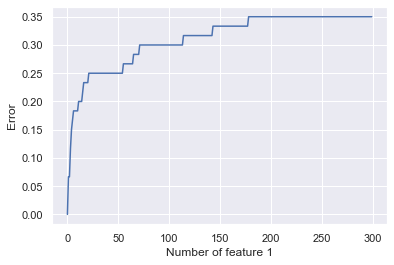

In [330]:
err = np.zeros(300)
default_X_trn = X_trn[:,1:] # Column of features 1 to 3
default_X_tst = X_tst[:,1:] 

for i in range(1,300):
    #======Your code here============

    X_trn_array = np.concatenate((default_X_trn,np.tile(X_trn[:,:1], (1,i))),axis=1)
    X_tst_array = np.concatenate((default_X_tst,np.tile(X_tst[:,:1], (1,i))),axis=1)
    
    test_prior, test_mean, test_std, test_output_labels = gnb_train(X_trn_array, y_trn)
    test_predict = gnb_predict(X_tst_array, test_prior, test_mean, test_std, test_output_labels)
    
    current_error = 0
    for a in range(len(y_tst)):
        if test_predict[a] != y_tst[a]:
            current_error = current_error + 1
    
    err[i] = current_error
    
#     print(current_error)
err = err / len(y_tst)
    #======Your code here============
plt.plot(err)
plt.xlim() 
plt.ylim()
plt.xlabel("Number of feature 1")
plt.ylabel("Error")

From the plot above, we can see that if we are to repeat the first feature from 1 time to 300 times, there is instead a worsering in the performance, causing the error to increase from 0.0667 or 6.67% (what we got with four different features), and to increase to 0.35 or 35% errors with 300 repeated feature one. So, if we are to repeat the first feature infinitely, the error would be around 0.367 or 36.7%. This is because when more duplicates of feature one is added, during the calculation of P(x,y), in which x is the feature and y is the label, there are just too many P(feature 1 | y=label) that the effect of the P of other features are diminished. As a result, when feature one is repeated a lot of times, the prediction will rely on the feature one only.

This experiment clearly describe the limitation of Naive Bayes. The features of the Naive Bayes need to be independent to each other, so that with more features the performance can improve, just as shown in Problem 2. In this problem, we are using feature 1 repetitively and so it is not independent, so no matter how may times we repeat it, the error will not decrease. On the other hand, it will just diminish the predictions from other independent features and prior probability, and makes our error increase up the the error rate when we are only using that one feature.

This limitation brings to the application of Naive Bayes to real life. With real life examples, it is difficult to make sure that each feature is independent to each other. After all, that is why Naive Bayes is called "Naive".